In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

df = yf.download(['AAPL'], start='2010-01-01', end='2019-12-31')
print(df.head())


/tmp/ipython-input-1130996228.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(['AAPL'], start='2010-01-01', end='2019-12-31')
[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2010-01-04  6.418384  6.433079  6.369498  6.400989  493729600
2010-01-05  6.429480  6.465769  6.395590  6.436078  601904800
2010-01-06  6.327209  6.454971  6.320611  6.429479  552160000
2010-01-07  6.315514  6.358101  6.269627  6.350604  477131200
2010-01-08  6.357502  6.358102  6.269928  6.307117  447610800


In [13]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2019-12-23,68.523354,68.583673,67.647508,67.686114,98572000
2019-12-24,68.588493,68.738093,68.262772,68.689834,48478800
2019-12-26,69.949295,69.966186,68.692232,68.721184,93121200
2019-12-27,69.922760,70.928898,69.517412,70.241251,146266000
2019-12-30,70.337753,70.620053,68.817696,69.840718,144114400


In [14]:
df=df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2010-01-04,6.418384,6.433079,6.369498,6.400989,493729600
1,2010-01-05,6.429480,6.465769,6.395590,6.436078,601904800
2,2010-01-06,6.327209,6.454971,6.320611,6.429479,552160000
3,2010-01-07,6.315514,6.358101,6.269627,6.350604,477131200
4,2010-01-08,6.357502,6.358102,6.269928,6.307117,447610800


In [15]:
df=df.drop(['Date'],axis=1)
df.head()

/tmp/ipython-input-3471825329.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df=df.drop(['Date'],axis=1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.418384,6.433079,6.369498,6.400989,493729600
1,6.429480,6.465769,6.395590,6.436078,601904800
2,6.327209,6.454971,6.320611,6.429479,552160000
3,6.315514,6.358101,6.269627,6.350604,477131200
4,6.357502,6.358102,6.269928,6.307117,447610800


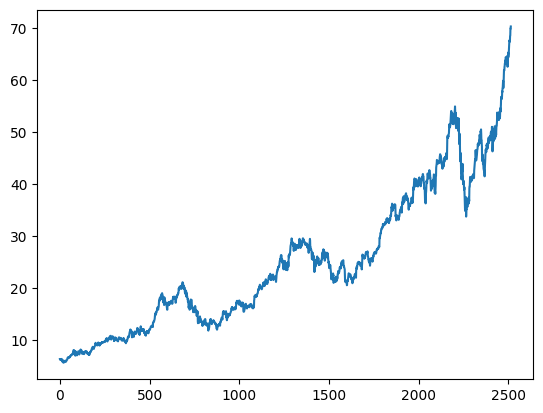

In [16]:
plt.plot(df.Close)

In [17]:
df


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.418384,6.433079,6.369498,6.400989,493729600
1,6.429480,6.465769,6.395590,6.436078,601904800
2,6.327209,6.454971,6.320611,6.429479,552160000
3,6.315514,6.358101,6.269627,6.350604,477131200
4,6.357502,6.358102,6.269928,6.307117,447610800
...,...,...,...,...,...
2510,68.523354,68.583673,67.647508,67.686114,98572000
2511,68.588493,68.738093,68.262772,68.689834,48478800
2512,69.949295,69.966186,68.692232,68.721184,93121200


In [18]:
ma100=df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,57.017867
2511,57.214825
2512,57.450985
2513,57.678108


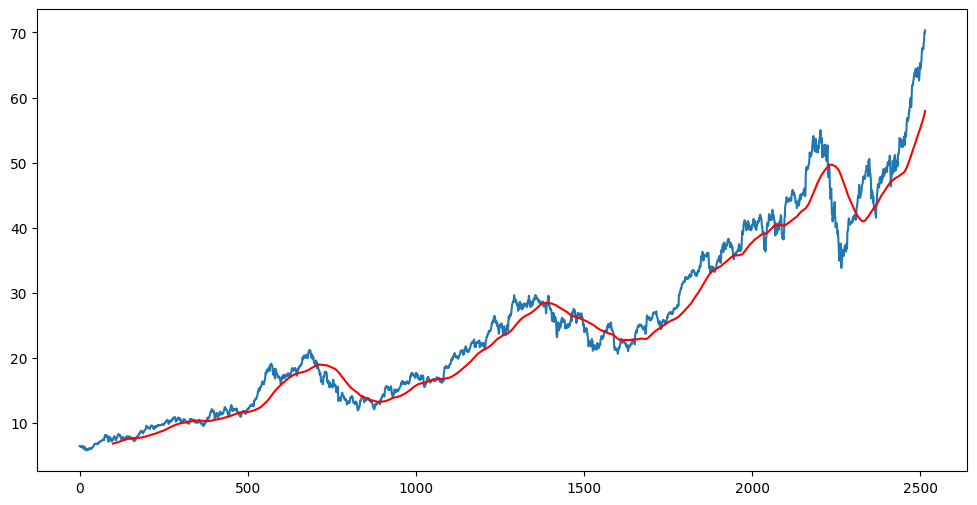

In [19]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [20]:
ma200=df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,51.986696
2511,52.113698
2512,52.246549
2513,52.376856


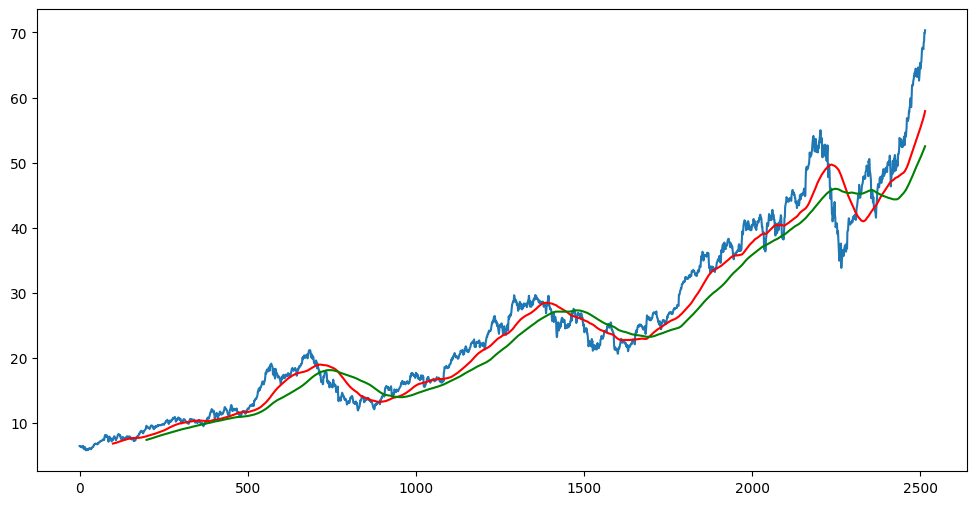

In [21]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [22]:
df.shape

(2515, 5)

In [23]:
#splitting data into training and testing

data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [24]:
data_training.head()

Ticker,AAPL
0,6.418384
1,6.429480
2,6.327209
3,6.315514
4,6.357502


In [25]:
data_testing.head()

Ticker,AAPL
1760,26.904562
1761,26.694818
1762,26.770878
1763,26.740917
1764,26.876904


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [27]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.02760004],
       [0.02806506],
       [0.02377921],
       ...,
       [0.88408372],
       [0.89123156],
       [0.88640212]])

In [29]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])

x_train ,y_train=np.array(x_train),np.array(y_train)


In [ ]:
# ML Model

In [30]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [31]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True ,
               input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60,activation='relu',return_sequences=True ))
model.add(Dropout(0.3))


model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 143ms/step - loss: 0.1566
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - loss: 0.0142
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 152ms/step - loss: 0.0116
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - loss: 0.0105
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 154ms/step - loss: 0.0098
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 185ms/step - loss: 0.0087
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - loss: 0.0089
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - loss: 0.0083
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 141ms/step - loss: 0.0075
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - loss: 0.0059
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - loss: 0.0068
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 154ms/step - loss: 0.0075
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 141ms/step - loss: 0.0074
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - loss: 0.0076
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step

In [35]:
model.save('Keras_model.keras')

In [36]:
past_100_days = data_training.tail(100)

In [38]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [39]:
final_df.head()

Ticker,AAPL
0,24.850122
1,24.951015
2,24.765284
3,24.749222
4,24.806559


In [41]:
input_data=scaler.fit_transform(final_df)

input_data

array([[0.02573571],
       [0.02789666],
       [0.02391861],
       [0.0235746 ],
       [0.02480265],
       [0.03118729],
       [0.03069613],
       [0.02991013],
       [0.02922268],
       [0.03059796],
       [0.02642325],
       [0.02809308],
       [0.02406588],
       [0.02180648],
       [0.01871243],
       [0.01812306],
       [0.01409566],
       [0.01458675],
       [0.01768104],
       [0.02259235],
       [0.022445  ],
       [0.02568648],
       [0.01173826],
       [0.        ],
       [0.01134538],
       [0.02367289],
       [0.04243418],
       [0.06109751],
       [0.05790517],
       [0.05132382],
       [0.0512748 ],
       [0.05117663],
       [0.05643176],
       [0.04705103],
       [0.04788588],
       [0.04891735],
       [0.05314109],
       [0.04444806],
       [0.04872086],
       [0.04611793],
       [0.04847513],
       [0.04872086],
       [0.05284646],
       [0.05368135],
       [0.063455  ],
       [0.06468293],
       [0.06979053],
       [0.068

In [42]:
input_data.shape

(855, 1)

In [43]:
x_test=[]
y_test=[]

for i in range(100 , input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

In [44]:
x_test , y_test= np.array(x_test) , np.array(y_test)

print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [45]:
# Making Predictions

y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step


In [46]:
y_predicted.shape

(755, 1)

In [47]:
y_test

array([0.06973816, 0.06524583, 0.06687488, 0.06623318, 0.06914576,
       0.07556345, 0.08089489, 0.08148728, 0.08464665, 0.08217833,
       0.0811418 , 0.08588088, 0.08583153, 0.08479482, 0.08588088,
       0.08627579, 0.08573279, 0.09516164, 0.09545781, 0.09550721,
       0.09392746, 0.09254515, 0.12907592, 0.12799004, 0.13070506,
       0.13667828, 0.14280004, 0.14531738, 0.15002758, 0.14854003,
       0.15434094, 0.16291831, 0.16534753, 0.16455452, 0.16638881,
       0.17124779, 0.17328051, 0.17040461, 0.17104937, 0.17238789,
       0.1726855 , 0.18656763, 0.18245277, 0.18651844, 0.18433694,
       0.18522907, 0.18265114, 0.18106437, 0.18334514, 0.1836427 ,
       0.18260139, 0.18988955, 0.19103006, 0.18755976, 0.1948476 ,
       0.18681568, 0.19464938, 0.19217056, 0.19078217, 0.19197227,
       0.20644932, 0.20803585, 0.20709397, 0.205755  , 0.20595371,
       0.21125859, 0.20754016, 0.205755  , 0.20416872, 0.2033257 ,
       0.19569078, 0.1965334 , 0.19281504, 0.19668234, 0.19355

In [48]:
scaler.scale_

array([0.02141822])

In [49]:
scale_factor = 1/0.02141822
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

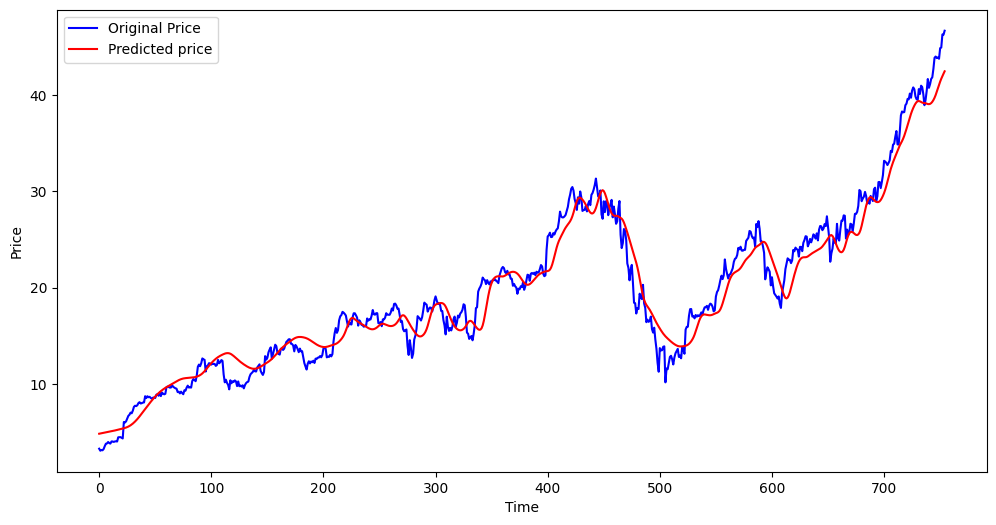

In [50]:
plt.figure(figsize=(12,6))
plt.plot(y_test , 'b' ,label='Original Price')
plt.plot(y_predicted , 'r' ,label='Predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()